In [171]:
#https://stackoverflow.com/questions/47330244/generating-random-transition-probability-matrix-python
#https://docs.python.org/3/library/random.html
#ref: https://www.datacamp.com/tutorial/markov-chains-python-tutorial

In [172]:
from Transition import Transition

[[0.91858594 0.0445017  0.03691235]
 [0.40564737 0.28066014 0.31369249]
 [0.18212632 0.11563776 0.70223592]]
[[0.91858594 0.0445017  0.03691235]
 [0.40564737 0.28066014 0.31369249]
 [0.18212632 0.11563776 0.70223592]]


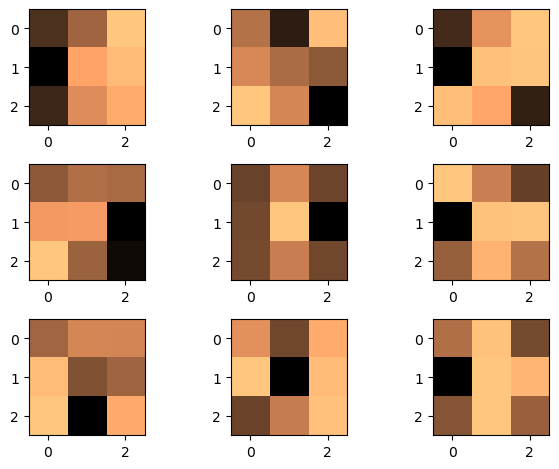

In [173]:
import datetime

Tra = Transition(3,3)

for _ in range(1):
    Tra.gen_state_prob(3, "uniform")
    M = Tra.get_transition_matrix()
    print(M)


print(M)

import numpy as np
from matplotlib import pyplot as plt
"""
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(M, cmap="copper_r")
plt.colorbar(im)
plt.show()
"""
figure, axis = plt.subplots(3, 3)

for i in range(3):
    for j in range(3):
        Tra.gen_state_prob(3, "uniform")
        M = Tra.get_transition_matrix()
        plt.rcParams["figure.autolayout"] = True
        axis[i,j].imshow(M, cmap="copper_r")
        


#axis[0, 1].plot(X, Y2)
#axis[0, 1].set_title("Cosine Function")
#plt.savefig("plots/TM-heatmap-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show()

## Plot State Transition Diagram

In [174]:
'''
import numpy as np
from matplotlib import pyplot as plt

# Import the MarkovChain class from markovchain.py
from markovchain import MarkovChain
P = np.array(transition_matrix)
mc = MarkovChain(P, ['left', 'straight', 'right'])
mc.draw()
'''

"\nimport numpy as np\nfrom matplotlib import pyplot as plt\n\n# Import the MarkovChain class from markovchain.py\nfrom markovchain import MarkovChain\nP = np.array(transition_matrix)\nmc = MarkovChain(P, ['left', 'straight', 'right'])\nmc.draw()\n"

## Simulate Map

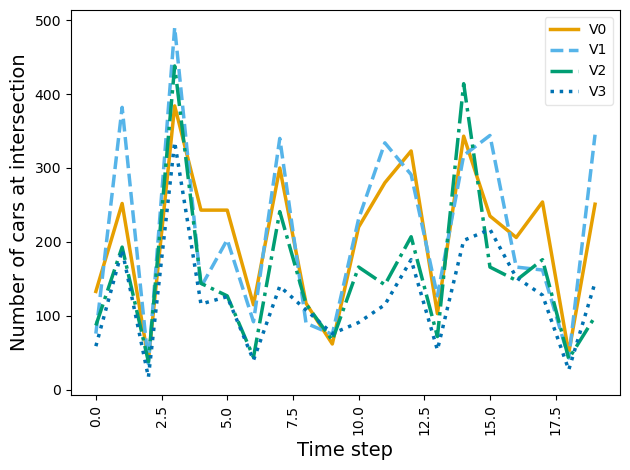

In [175]:
from MarkovProcess import MarkovChain
from Population import Population
from Simulate import Simulate

P = Population(20,0.5,0.5,30)

timeSteps = [10,50,100,150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
#timeSteps = [10,100,500,1000,1500,2000,2500,3000,3500,4000]
S = Simulate(timeSteps)

S.addCars = True        #add new cars at every time step
S.addActCars = False
S.runSimulation(P)
#S.printMap(False)
S.plotData()
Features, Labels = S.getLearningData()
#[print(Features[i]) for i in range(5)] 
#print()
#[print(Labels[i]) for i in range(5)] 

S.generateTestingData(100)
tFeatures, tLabels = S.getTestingData()
#print(tLabels)
#print(tFeatures)

#override features
#S.generateTestingData(1000)
#Features, Labels = S.getTestingData()

del S

In [176]:
#https://vknight.org/unpeudemath/code/2015/08/01/simulating_continuous_markov_chains.html

## Plot MarkovChain

In [177]:
'''
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)
'''

'\nimport pygraphviz as pgv\nfrom IPython.display import Image\n\ndef draw(dot):\n    return Image(pgv.AGraph(dot).draw(format=\'png\', prog=\'dot\'))\n\ng1 = """digraph top {\n   a -> b -> c;\n}"""\ndraw(g1)\n'

## Decision Tree Classifier

In [178]:
from sklearn import tree
X = Features
Y = Labels
pLabels = []
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

matched = 0
for i in range(len(tFeatures)):
    #print(clf.predict([tFeatures[i]]),"-->",tLabels[i])
    if clf.predict([tFeatures[i]]) == tLabels[i]:
        matched+=1
    pLabels.append(clf.predict([tFeatures[i]])[0])
        
#print(len(pLabels), len(tLabels))
print("accuracy: ", matched/len(tFeatures))

#clf.predict([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])
#clf.predict_proba([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])

accuracy:  0.41


In [179]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("traffic_tree") 
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("traffic_tree") \n'

## Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics

classifier = LogisticRegression()
classifier.fit(Features, Labels)
score = metrics.accuracy_score(Labels, classifier.predict(Features))
print("Accuracy: %f" % score)

Accuracy: 0.547368


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

## Neural Network MLP Classifier

data: 380
labels: 380
MinMaxScaler()
[0.6412721  0.35825089 0.03378747 0.01270174 0.78005804 0.2815194
 0.33273777 0.22601802 0.48403921 0.         0.         1.        ]
[0.32099611 0.47814269 0.24047866 0.40915988 0.27400297 0.38523891
 0.52112472 0.51369369 0.01520857 1.         0.         0.        ]
[0.45955709 0.40687563 0.17024611 0.22188744 0.47160811 0.37780554
 0.47439898 0.48233254 0.09213141 1.         0.         0.        ]
[0.4054669  0.46107621 0.17156849 0.39858898 0.5719007  0.09722415
 0.04664541 0.14995825 0.84089002 1.         0.         0.        ]
[0.51215398 0.34966976 0.17341314 0.45007354 0.53322238 0.08357437
 0.75309378 0.07130438 0.22199024 0.         1.         0.        ]
MinMaxScaler()
accuracy:  0.53
score: 0.6
loss: 0.8967813067459158


/Users/haider/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


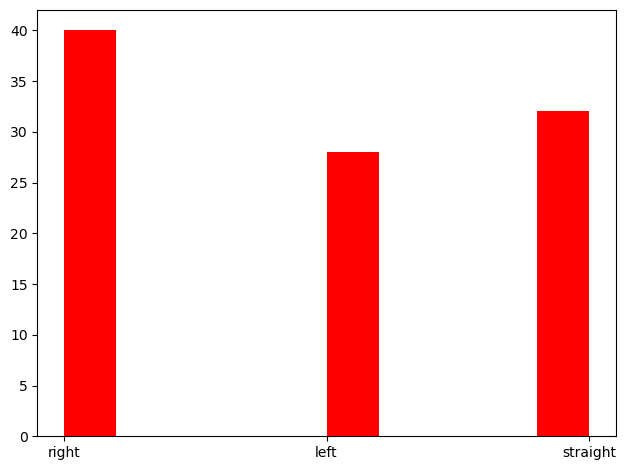

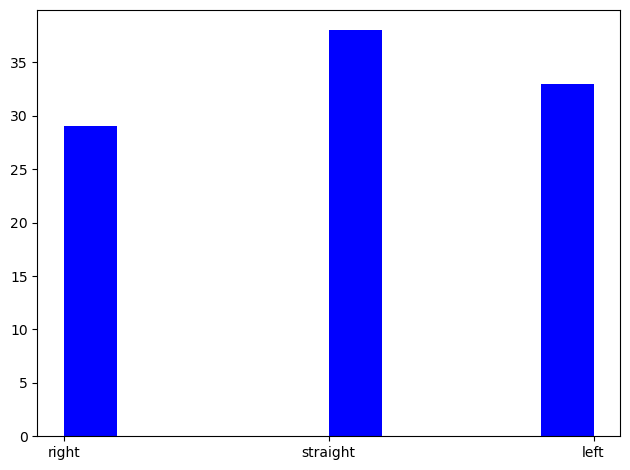

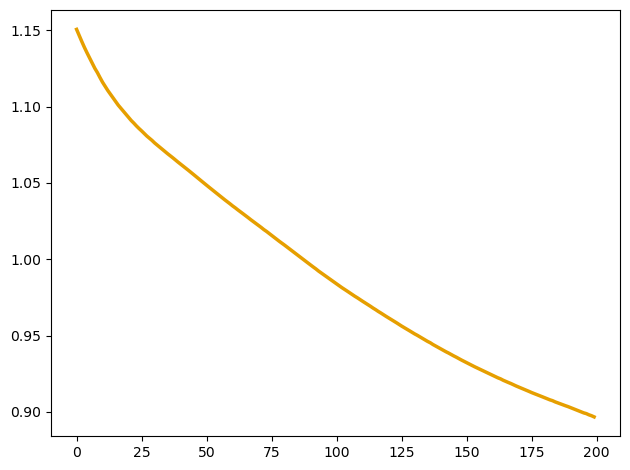

In [181]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
X = Features
y = Labels
MLPpLabels = []
    

print("data:",len(X))
print("labels:",len(y))

#scale learning data
dataX = X
scaler = MinMaxScaler()
print(scaler.fit(dataX))
dataX = scaler.transform(dataX)

[print(dataX[i]) for i in range(5)] 

clf = MLPClassifier(activation="relu",
                    solver='adam',#'lbfgs', 
                    alpha=0.00001,
                    hidden_layer_sizes=(12, ), 
                    random_state=1,
                    batch_size='auto',
                    early_stopping=False,
                    warm_start=True)

clf.fit(dataX, y)

#scale testing data
tDataX = tFeatures
scaler = MinMaxScaler()
print(scaler.fit(tDataX))
tDataX = scaler.transform(tDataX)

matched = 0
lbl = ""
for i in range(len(tDataX)):
    L = clf.predict([tDataX[i]])
    if L == tLabels[i]:
        matched+=1
    MLPpLabels.append(L[0])

print("accuracy: ", matched/len(tDataX))
print("score:", clf.score(dataX, y))
print("loss:", clf.loss_)

from matplotlib import pyplot as plt

plt.hist(tLabels, color='r')
#plt.legend()
plt.show()
plt.hist(MLPpLabels, color='b')
plt.show()
#print("tLabels", tLabels)
#print("MLPpLabels", MLPpLabels)

plt.plot(clf.loss_curve_, label="loss")
#plt.plot(clf.best_validation_score_, label="validation")

#plt.legend(True)
plt.show()



#clf.predict_proba([[2., 2.], [1., 2.]])

## Confusion Matrix

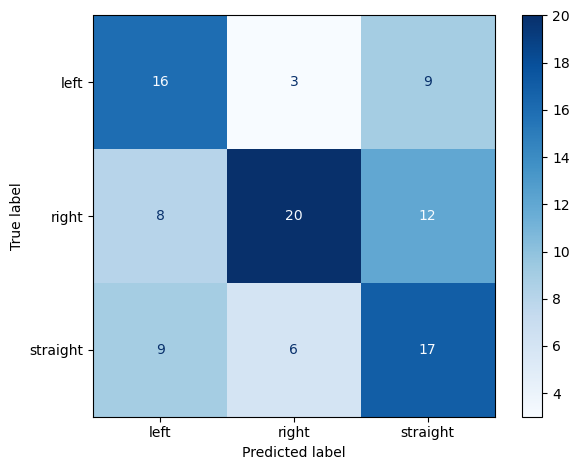

In [182]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import datetime

actual = tLabels
predicted = pLabels

#confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=clf.classes_)#["left", "straight", "right"])
confusion_matrix = metrics.confusion_matrix(actual, MLPpLabels, labels=clf.classes_)#["left", "straight", "right"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)#[False, True])

cm_display.plot(cmap = 'Blues')
#plt.savefig("plots/confusion-matrix-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show() 

In [183]:
#LATEST 01/19